In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sales = pd.read_csv('./train.csv')
sales.head()

/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
store = pd.read_csv('./store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
test = pd.read_csv('./test.csv')

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###  一周数据查看

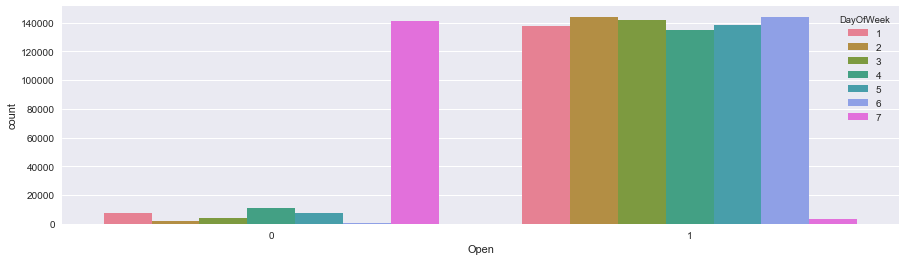

In [6]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=sales,palette="husl", ax=axis1)
plt.show()

In [5]:
sales['Year'] = sales['Date'].apply(lambda x:int(str(x)[:4]))
sales['Month'] = sales['Date'].apply(lambda x:int(str(x)[5:7]))
sales['Date'] = sales['Date'].apply(lambda x: (str(x)[:7]))
test['Year']  = test['Date'].apply(lambda x: int(str(x)[:4]))
test['Month'] = test['Date'].apply(lambda x: int(str(x)[5:7]))
test['Date']  = test['Date'].apply(lambda x: (str(x)[:7]))
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


### 销售额波动情况

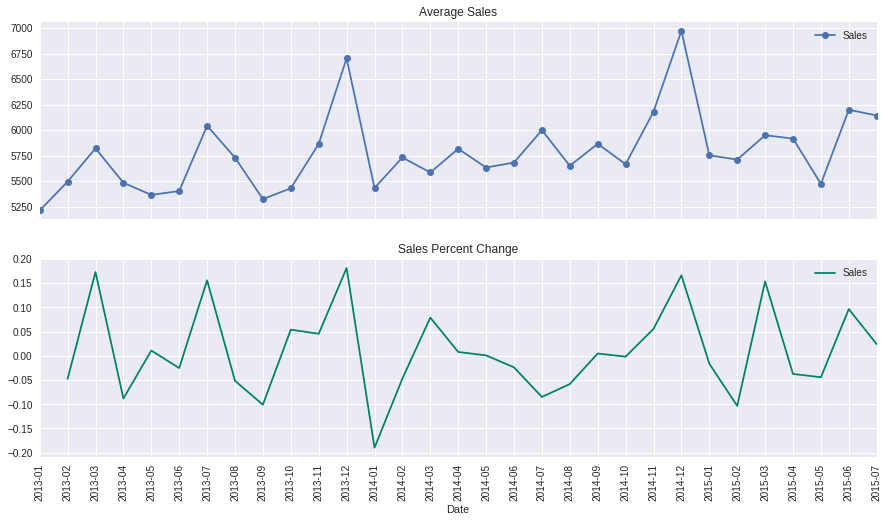

In [10]:
average_sales = sales.groupby('Date')['Sales'].mean()
pct_change_sales = sales.groupby('Date')['Sales'].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

pct_change_sales.plot(legend=True,ax=axis2,marker='x',rot=90,colormap="summer",title="Sales Percent Change")
plt.show()

In [11]:
sns.barplot(x='Year', y='Sales', data=sales, ax=axis1)
sns.barplot(x='Year', y='Customers', data=sales, ax=axis2)
plt.show()

### 用户数时间波动情况

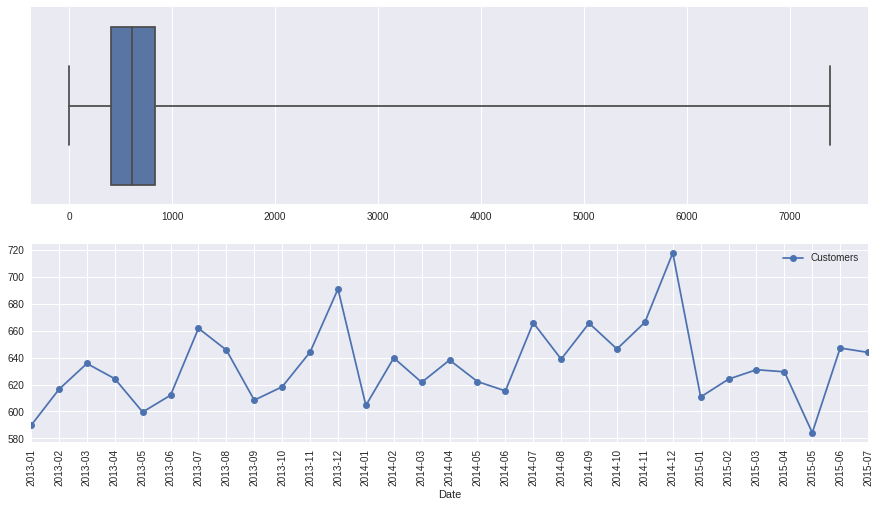

In [12]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([sales["Customers"]], whis=np.inf, ax=axis1)
average_customers = sales.groupby('Date')["Customers"].mean()
ax = average_customers.plot(legend=True,marker='o', ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(), rotation=90)
plt.show()

### 销售额用户数一周情况

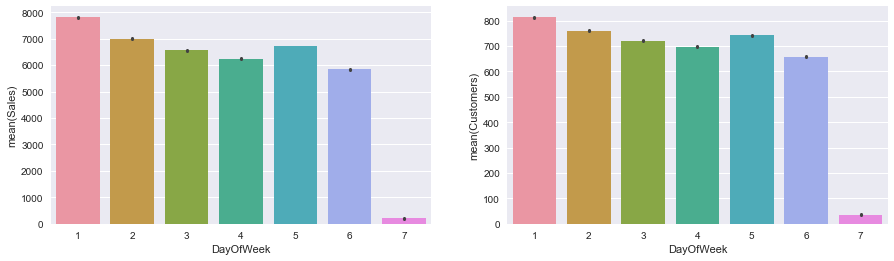

In [11]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x = 'DayOfWeek',y = 'Sales',data= sales,order = [1,2,3,4,5,6,7],ax = axis1)
sns.barplot(x='DayOfWeek',y ='Customers',data= sales,order = [1,2,3,4,5,6,7],ax = axis2)
plt.show()

### 促销和非促销对比分析

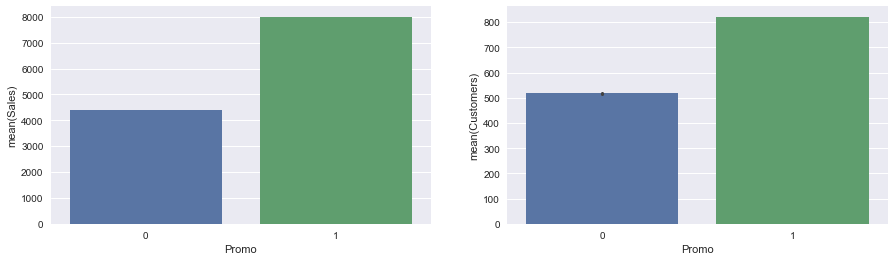

In [12]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x= 'Promo',y = 'Sales',data= sales,ax = axis1)
sns.barplot(x= 'Promo',y = 'Customers',data = sales,ax = axis2)
plt.show()

### 节假日分析

E:\Users\wang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


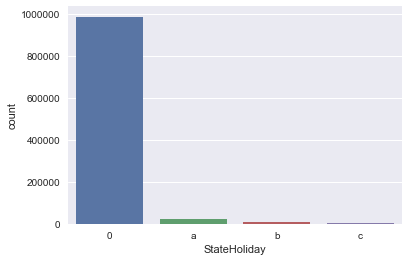

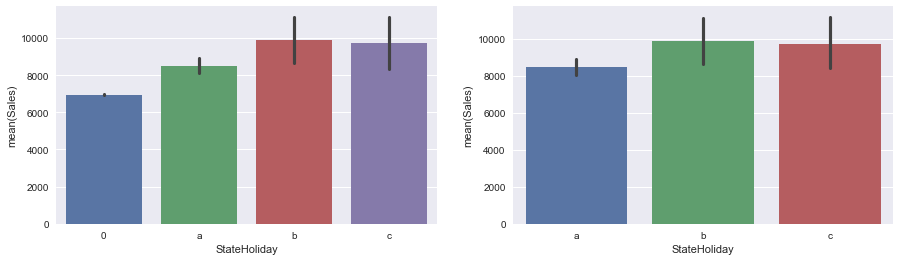

In [8]:
sales['StateHoliday'].loc[sales['StateHoliday']==0] ='0'
sns.countplot(x='StateHoliday',data = sales)
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StateHoliday',y='Sales',data = sales[sales["Sales"] > 0],ax=axis1)
mask = (sales["StateHoliday"] != "0") & (sales["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=sales[mask], ax=axis2)
# sns.barplot(x='StateHoliday',y='Sales',data=sales[(sales['StateHoliday']!=0) & sales['Sales']>0],ax = axis2)
plt.show()

###  节假日和非节假日对比分析

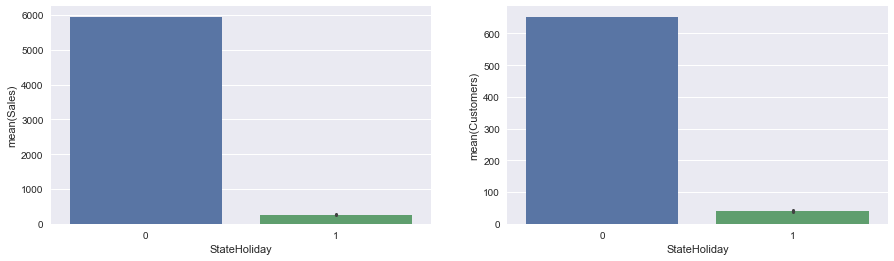

In [14]:
sales['StateHoliday'] = sales['StateHoliday'].map({0:0,"0":0,"a":1,"b":1,"c":1})

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StateHoliday',y='Sales',data=sales,ax=axis1)
sns.barplot(x='StateHoliday',y='Customers',data= sales,ax=axis2)
plt.show()

### 学校假日对比分析

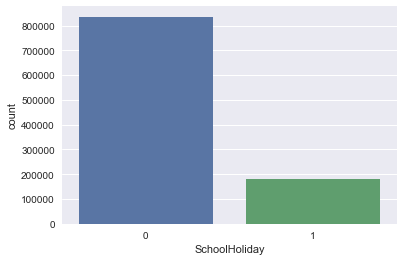

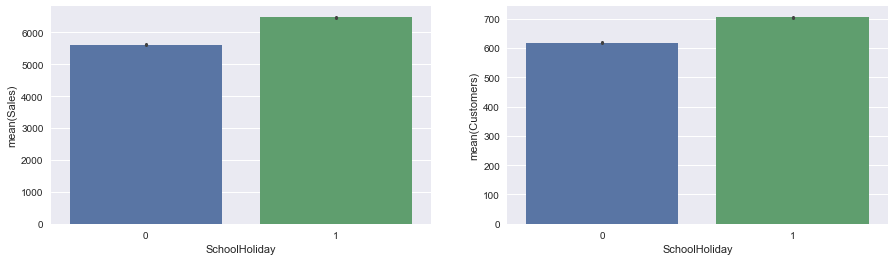

In [16]:
sns.countplot(x='SchoolHoliday',data=sales)
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='SchoolHoliday',y='Sales',data=sales,ax=axis1)
sns.barplot(x='SchoolHoliday',y='Customers',data=sales,ax=axis2)
plt.show()

### 消费者数量分析

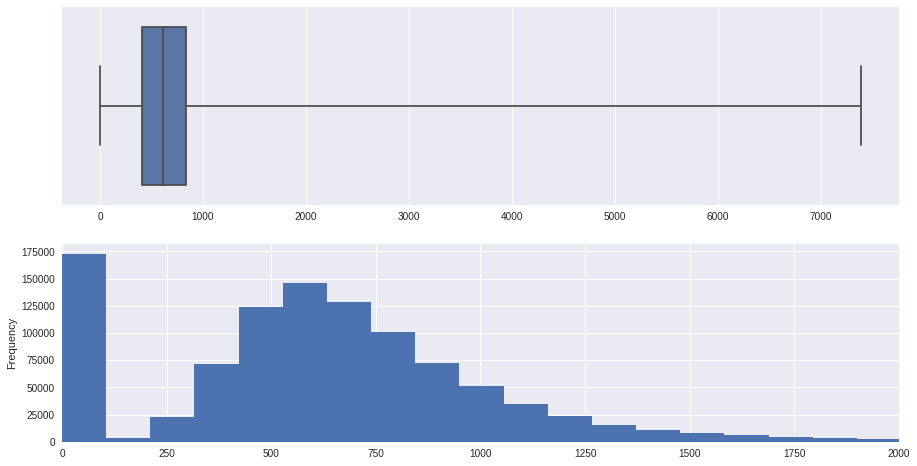

In [18]:
fig,(axis1,axis2) = plt.subplots(2,1,figsize = (15,8))
sns.boxplot([sales['Customers']],whis=np.inf,ax=axis1)
sales['Customers'].plot(kind='hist',bins=70,xlim=(0,2000),ax=axis2)
plt.show()

In [18]:
average_sales_customer = sales.groupby('Store')[['Sales','Customers']].mean()
sales_customers_df = pd.DataFrame({'Store':average_sales_customer.index,
                                'Sales':average_sales_customer['Sales'],
                                'Customers':average_sales_customer['Customers']},
                               columns=['Store','Sales','Customers'])
store_df = pd.merge(sales_customers_df,store,on='Store')
store_df.head()

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 商店类型对比分析

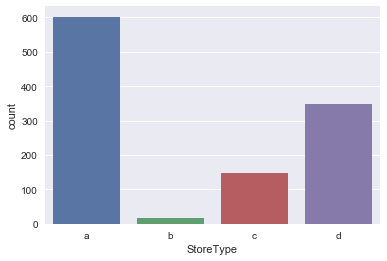

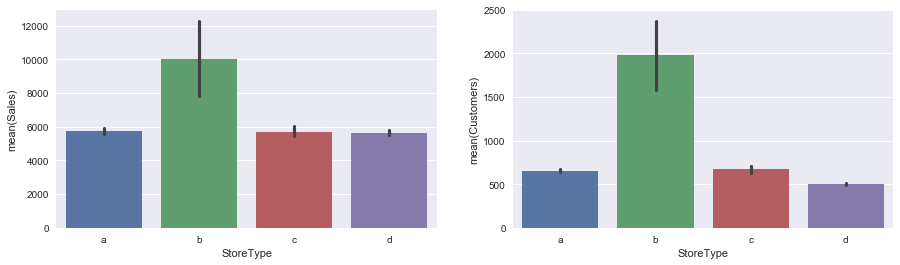

In [19]:
sns.countplot(x='StoreType',data=store_df,order=['a','b','c','d'])
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType',y='Sales',data=store_df,order=['a','b','c','d'],ax=axis1)
sns.barplot(x='StoreType',y='Customers',data=store_df,order=['a','b','c','d'],ax=axis2)
plt.show()

### 商店等级分析

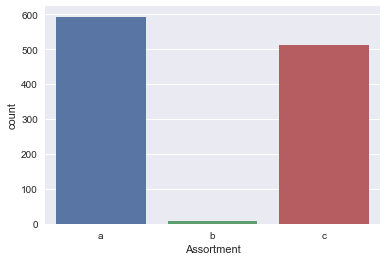

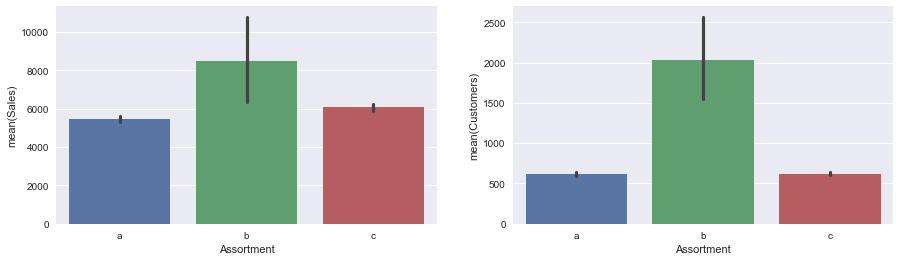

In [20]:
sns.countplot(x='Assortment',data=store_df,order=['a','b','c'])
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Assortment',y='Sales',data=store_df,order=['a','b','c'],ax=axis1)
sns.barplot(x='Assortment',y='Customers',data=store_df,order=['a','b','c'],ax=axis2)
plt.show()

###  是否持续促销对比分析

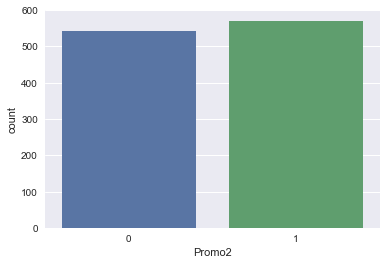

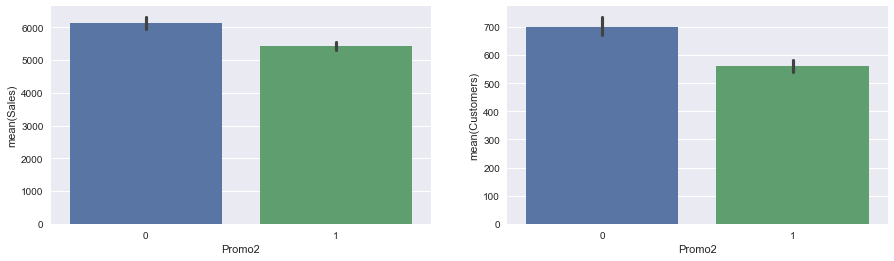

In [21]:
sns.countplot(x='Promo2', data=store_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=store_df, ax=axis1)
sns.barplot(x='Promo2', y='Customers', data=store_df, ax=axis2)
plt.show()

In [22]:
sales.groupby('StateHoliday').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month
StateHoliday,,,,,,,,,,
0,986159,986159,986159,986159,986159,986159,986159,986159,986159,986159
1,31050,31050,31050,31050,31050,31050,31050,31050,31050,31050


### 国家节假日对比分析

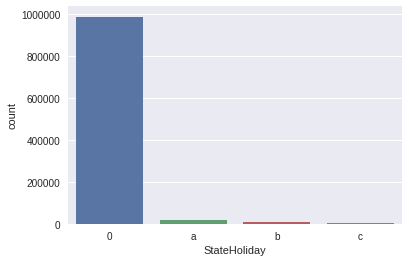

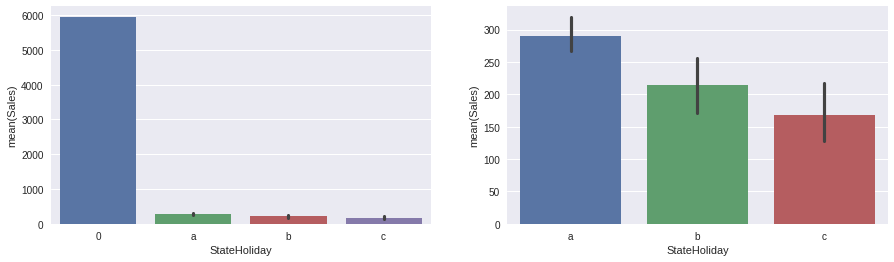

In [15]:
sns.countplot(x='StateHoliday',data=sales)
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StateHoliday',y='Sales',data=sales,ax=axis1)
sns.barplot(x='StateHoliday',y='Sales',data=sales[(sales["StateHoliday"] != "0")],ax=axis2)

### 国家节假日与非节假日对比分析

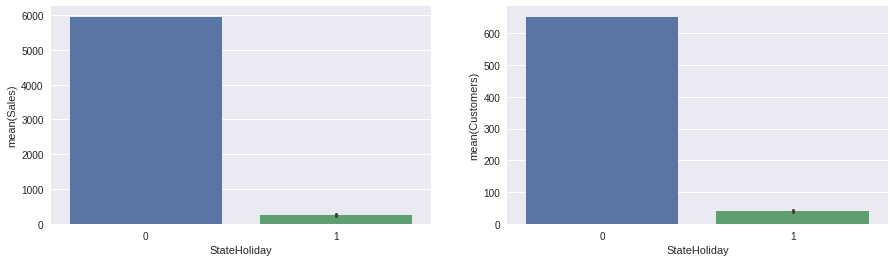

In [6]:
sales["StateHoliday"] = sales["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test["StateHoliday"]     = test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=sales, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=sales, ax=axis2)
plt.show()

### 学校节假日对比分析

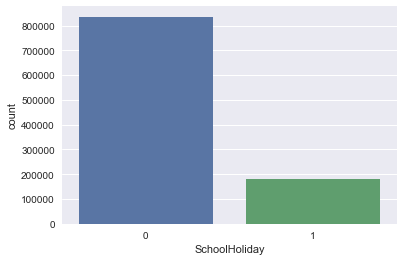

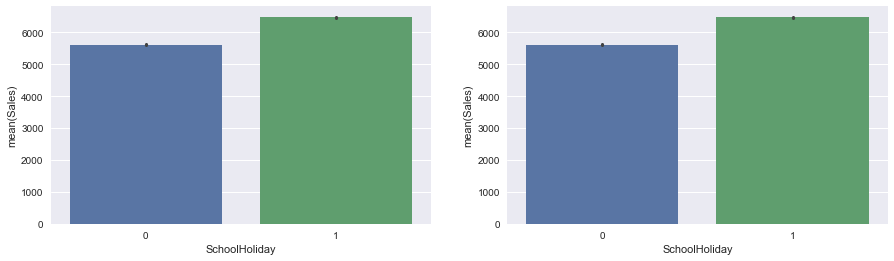

In [26]:
sns.countplot(x='SchoolHoliday',data=sales)
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='SchoolHoliday',y='Sales', data=sales,ax=axis1)
sns.barplot(x='SchoolHoliday',y='Sales',data=sales,ax=axis2)
plt.show()

### 消费者数量箱型图和直方图分析

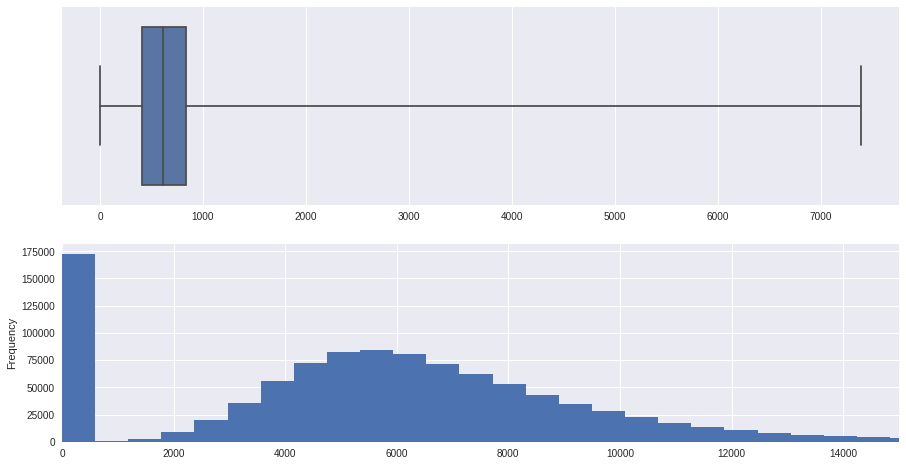

In [9]:
fig,(axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([sales['Customers']],whis=np.inf,ax=axis1)
sales['Sales'].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)
plt.show()

### 销售额箱型图和直方图分析

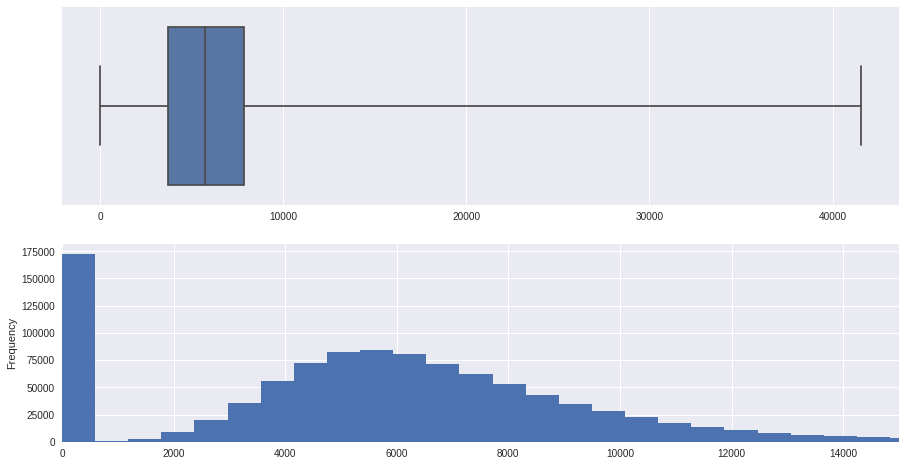

In [7]:
fig,(axis1,axis2) = plt.subplots(2,1,figsize=(15,8))
sns.boxplot([sales['Sales']],whis=np.inf,ax=axis1)
sales['Sales'].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)
plt.show()

In [32]:
average_sales_customers = sales.groupby('Store')[['Sales','Customers']].mean()  #计算各个店客户数和销售额平均值
sales_customers = pd.DataFrame({'Store':average_sales_customers.index,
                               'Sales':average_sales_customers['Sales'],
                               'Customers':average_sales_customers['Customers']},
                              columns = ['Store','Sales','Customers'])
store_df = pd.merge(sales_customers,store_df,on='Store')
store_df.head()

,Store,Sales,Customers,Sales_x,Customers_x,Sales_y,Customers_y,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,3945.704883,467.646497,3945.704883,467.646497,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,4122.991507,486.045648,4122.991507,486.045648,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,5741.253715,620.286624,5741.253715,620.286624,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,8021.769639,1100.057325,8021.769639,1100.057325,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,3867.110403,444.360934,3867.110403,444.360934,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 商店类型对比分析

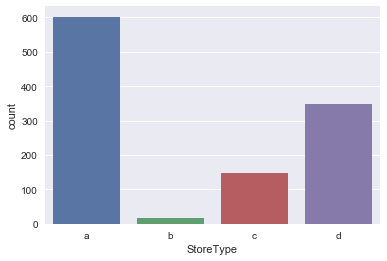

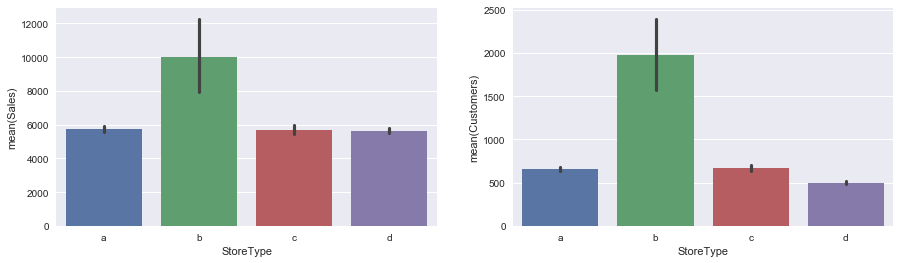

In [33]:
sns.countplot(x='StoreType',data=store_df,order = ['a','b','c','d'])
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType',y='Sales',data=store_df,order=['a','b','c','d'],ax=axis1)
sns.barplot(x='StoreType',y='Customers',data=store_df,order=['a','b','c','d'],ax=axis2)
plt.show()

### 商店等级对比分析

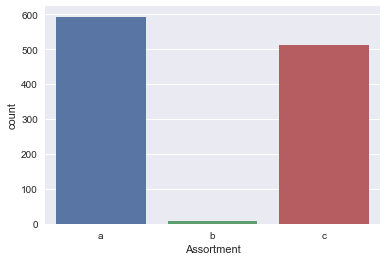

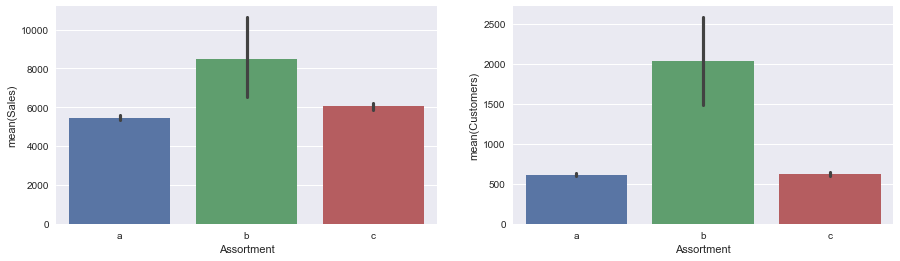

In [34]:
sns.countplot(x='Assortment',data=store_df,order=['a','b','c'])
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Assortment',y='Sales',data=store_df,order=['a','b','c'],ax=axis1)
sns.barplot(x='Assortment',y='Customers',data=store_df,order=['a','b','c'],ax=axis2)
plt.show()

### 持续推促销对比分析

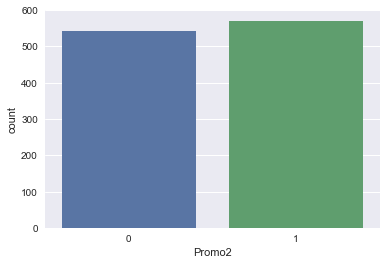

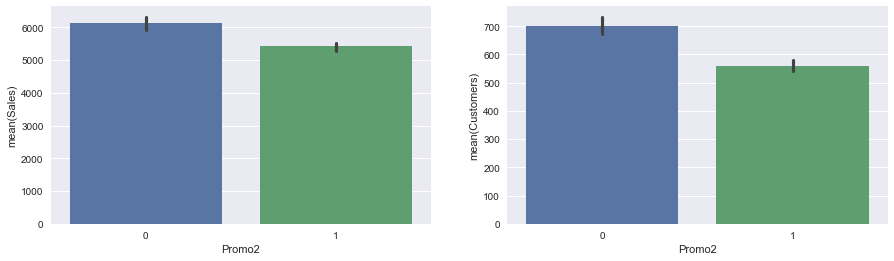

In [35]:
sns.countplot(x='Promo2',data=store_df)
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Promo2',y='Sales',data=store_df,ax=axis1)
sns.barplot(x='Promo2',y='Customers',data=store_df,ax=axis2)

### 竞争者距离分析

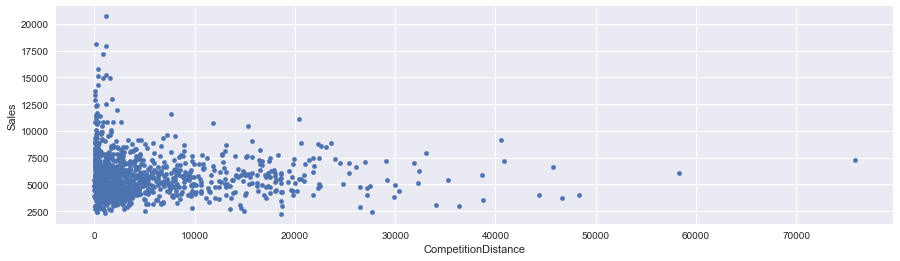

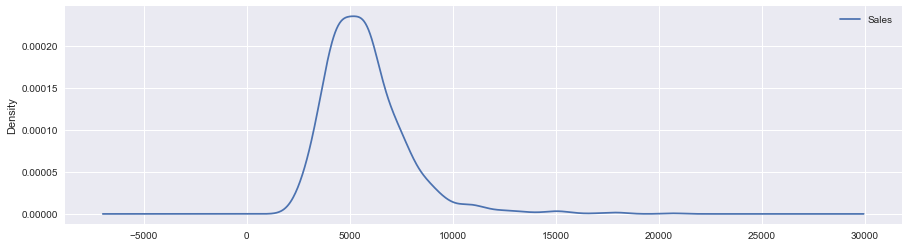

In [36]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())
store_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
store_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

### 一家店每月销售波动情况

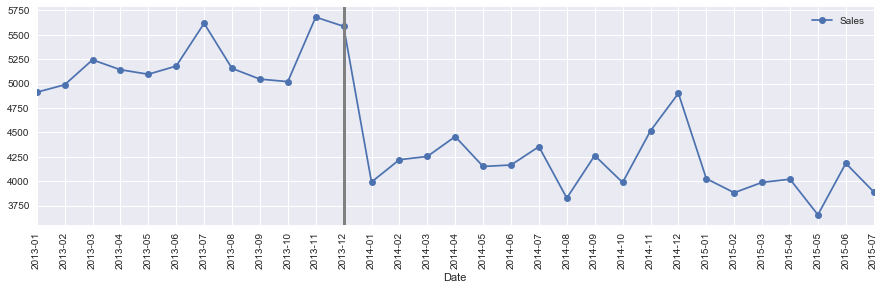

In [37]:
store_id = 6
store_data = sales[sales["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year, and month when Competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)
if y>=2013 and y==y and m==m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

In [39]:
store_piv = pd.pivot_table(sales,values='Sales',
                           index='Date',columns=['Store'],aggfunc='sum')   
store_pct_chage = store_piv.pct_change().dropna()
store_piv.head()

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01,128431.0,115171.0,165653.0,234713.0,109442.0,152265.0,188032.0,122293.0,127016.0,130042.0,...,115116.0,143763.0,143571.0,119190.0,106800.0,128626.0,304489.0,155879.0,456530.0,116482.0
2013-02,125271.0,111114.0,160167.0,230473.0,101126.0,139655.0,178830.0,119828.0,126826.0,122956.0,...,107923.0,140576.0,127544.0,115328.0,99489.0,122822.0,301544.0,147817.0,446745.0,123114.0
2013-03,145169.0,130525.0,189179.0,255514.0,116860.0,162550.0,213082.0,135408.0,143583.0,133609.0,...,124035.0,170060.0,148065.0,124393.0,116539.0,138298.0,312362.0,171412.0,516987.0,155033.0
2013-04,118009.0,116878.0,172188.0,226981.0,106141.0,154269.0,197381.0,127236.0,136194.0,131040.0,...,110478.0,154915.0,132135.0,118303.0,106745.0,131652.0,284870.0,148796.0,497336.0,126212.0
2013-05,118225.0,116379.0,170374.0,235284.0,110292.0,157972.0,210921.0,126886.0,136540.0,130642.0,...,111092.0,151585.0,131119.0,117329.0,105277.0,128784.0,284762.0,155649.0,503359.0,131329.0


### 店与店之间相关性分析

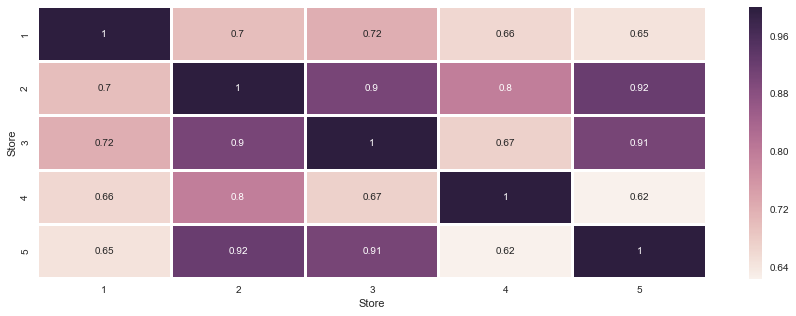

In [40]:
start_store = 1
end_store = 5
fig,(axis1) = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(store_piv[list(range(start_store,end_store+1))].corr(),annot=True,linewidths=2)
plt.show()

In [42]:
sales.drop(['Year','Month'],axis=1,inplace=True)
test.drop(['Year','Month'],axis=1,inplace=True)
day_dummies = pd.get_dummies(sales['DayOfWeek'],prefix='Day')
day_dummies.drop(['Day_7'],axis=1,inplace=True)

day_dummies_test = pd.get_dummies(test['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'],axis=1,inplace=True)

sales= sales.join(day_dummies)
test = test.join(day_dummies_test)

sales.drop(['DayOfWeek'],axis=1,inplace=True)
test.drop(['DayOfWeek'],axis=1,inplace=True)

In [43]:
sales = sales[sales['Open']!=0]
sales.drop(['Open','Customers','Date'],axis=1,inplace=True)

In [44]:
clos_store_ids = test['Id'][test['Open']==0].values
test = test[test['Open']!=0]
test.drop(['Open','Date'],axis=1,inplace=True)

In [7]:
sales_dic = dict(list(sales.groupby('Store')))
test_dic = dict(list(test.groupby('Store')))
submission = pd.Series()
scores = []

In [9]:
sales_dic[1]['Sales']

0          5263
1115       5020
2230       4782
3345       5011
4460       6102
5575          0
6690       4364
7805       3706
8920       3769
10035      3464
11150      3558
12265      4395
13380         0
14495      4406
15610      4852
16725      4427
17840      4767
18955      5042
20070      5054
21185         0
22300      3530
23415      3808
24530      3897
25645      3797
26760      3650
27875      4359
28990         0
30105      4797
31220      4665
32335      5558
           ... 
983760     4601
984875     3725
985990     4055
987105        0
988220     5598
989335     5586
990450     5195
991565     5578
992680     5720
993795     5394
994910        0
996025     5182
997140     4127
998255     4044
999370     4008
1000485    3900
1001600    4717
1002715       0
1003830    4952
1004945    4881
1006060    4892
1007175    5471
1008290    5580
1009405    7176
1010520       0
1011635    4997
1012750    4486
1013865    4327
1014980    5530
1016095       0
Name: Sales, Length: 942

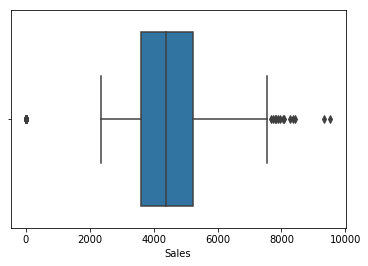

In [10]:
sns.boxplot(sales_dic[1]['Sales'])

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


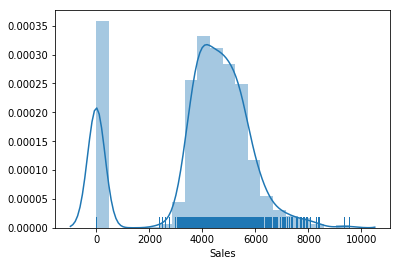

In [11]:
sns.distplot(sales_dic[1]['Sales'],kde=True, bins=20, rug=True)

In [1]:
# for i in teste_dic:
#     store = sales_dic[i]
#     X_train = store.drop(['Sales','Store'],axis=1)
#     Y_train = store['Sales']
#     X_test = test_dic[i].copy()
    
#     store_ids = X_test['Id']
#     X_test.drop(['Id','Store'],axis=1,inplace = True)
#     lreg = LinearRegression()
#     lreg.fit(X_train,Y_train)
#     Y_pred = lreg.predict(X_test)
#     lreg.score
#     scores.append(lreg.score(X_train,Y_train))
    
#     Xgboost
#     params = {"objective":'reg:linear','max_depth':10}
#     T_train_xgb = xgb.DMatrix(X_train,Y_train)
#     X_test_xgb = xgb.DMatrix(X_train,Y_train)
#     gbm = xgb.train(params,T_train_xgb,100)
#     Y_pred = gbm.predict(X_test_xgb)
    
#     submission = submission.append(pd.Series(Y_pred,index=store_ids))
    
# submission = submission.append(pd.Series(0,index=clos_store_ids))

# submission = pd.DataFrame({'Id':submission.index,'Sales':submission.values})